<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/machine_learning/lessons/yolo_cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Példa a YOLO modell használatára saját Python kódból

Telepítsük a *ultralytics* modult, hogy a már betanított YOLO modellt használhassuk.

In [1]:
!pip -q install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.9/777.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 39.9 MB/s eta 0:00:00


In [2]:
from matplotlib import pyplot as plt
import cv2
from ultralytics import YOLO

Töltsük be a YOLO modell súlyait.

In [3]:
model = YOLO("yolo-Weights/yolov8n.pt")
model.info()

100%|██████████| 6.23M/6.23M [00:00<00:00, 79.2MB/s]


YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

Az alábbi objektum fajták detektálására tanították be a modellt.

In [4]:
classNames = model.names
for key, value in classNames.items():
    if key % 10 == 0: print()
    print(value, end=", ")


person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, 
fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, 
elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, 
skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, 
wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, 
broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, 
dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, 
toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush, 

Töltsünk le egy képet!

In [5]:
!wget -q http://www.agt.bme.hu/keptar/workshop10/BY0A3586.JPG

Alkalmazzuk a modellt a képre! A megtalált objektumok befoglaló téglalapja és neve mellett a találat vaószínűségét is megkapjuk.


0: 448x640 17 persons, 6 chairs, 2 dining tables, 1 laptop, 118.4ms
Speed: 16.9ms preprocess, 118.4ms inference, 2087.5ms postprocess per image at shape (1, 3, 448, 640)
1038, 451, 1310, 971: person 91.5%
 317, 469,  625, 992: person 85.9%
 657, 489,  814, 934: chair 81.5%
1283, 598, 1476, 952: chair 77.3%
1299, 291, 1435, 734: person 75.4%
 468, 419,  574, 548: person 70.2%
   0, 730,  328, 1017: laptop 65.4%
 115, 421,  232, 531: person 62.1%
 865, 582, 1036, 939: chair 62.0%
1224, 351, 1330, 600: person 61.8%
 698, 341,  793, 497: person 61.4%
 296, 434,  382, 539: person 61.2%
 953, 428, 1052, 591: person 57.3%
 826, 421,  940, 529: person 54.0%
1036, 330, 1125, 455: person 45.0%
 925, 358,  982, 470: person 37.6%
  39, 533,  227, 710: chair 36.7%
1208, 550, 1284, 686: chair 35.9%
 821, 423,  940, 567: person 33.8%
 386, 416,  440, 472: person 32.0%
1041, 410, 1109, 536: person 31.6%
 217, 500,  303, 541: chair 28.2%
 117, 419,  234, 576: person 28.2%
 879, 588, 1017, 647: dining 

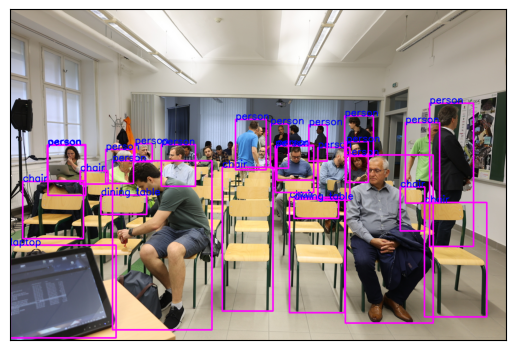

In [6]:
img = cv2.imread('BY0A3586.JPG')
for r in model.predict(img):
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0]        # bounding box
        print(f"{int(x1):4d}, {int(y1):3d}, {int(x2):4d}, {int(y2):3d}: {classNames[int(box.cls[0])]} {box.conf[0]:.1%}")
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 255), 3)
        cv2.putText(img, classNames[int(box.cls[0])], (int(x1), int(y1)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

A *yol.py* program a GitHub oldalon egy a webkamerából vagy egy videó fájlból érkező képek feldolgozását valósítja meg, melyet a saját gépén futtathat.